# Mini Project (Stress Classification + Kaggle)

### Student - Naif A. Ganadily
### Instructor - Prof. Karthik Mohan <br>
### TA - Ayush Singh <br>
### Grader - Fatwir SM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree


In [11]:
# Load the csv files over here into pandas data frame
# YOUR CODE HERE
# 0.1
def load_csv(file_name):
  return pd.read_csv(file_name)

df1 = load_csv('/content/kaggle_dataset.csv')
df2 = load_csv('/content/local_dataset.csv')

display(df1)
display(df2)


  # Input: csv_file_name
  # Output: pandas data frame

,Id,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF
0,0,95.135158,0.890853,0.974164,0.889935,0.096018,0.046200,0.032778,0.105342,0.105342,0.000640,0.0,0.0,NaN
1,1,82.564200,0.628600,0.980480,0.629127,0.085506,0.040439,0.025833,0.104875,0.104875,0.000640,0.0,0.0,NaN
2,2,90.010889,0.944939,0.972702,0.943657,0.121277,0.058594,0.034412,0.166643,0.166643,0.000640,0.0,0.0,NaN
3,3,81.102854,0.811532,0.976090,0.811925,0.049806,0.023856,0.030641,0.026524,0.026524,0.000640,0.0,0.0,NaN
4,4,89.572000,0.844262,0.974839,0.843826,0.050792,0.024407,0.032027,0.025992,0.025992,0.000640,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,76.003579,0.860537,0.974164,0.860530,0.113934,0.053516,0.199444,0.142094,0.142094,0.000640,0.0,0.0,NaN
996,996,65.485229,1.016943,0.971909,1.015859,0.099349,0.048112,0.035303,0.106505,0.106505,0.000640,0.0,0.0,NaN
997,997,70.635158,0.892563,0.974164,0.891692,0.092064,0.048848,0.088333,0.096370,0.096370,0.000640,0.0,0.0,NaN
998,998,81.622000,0.818675,0.975480,0.819262,0.072122,0.028896,0.083947,0.050305,0.050305,0.000640,0.0,0.0,NaN


,Id,HR,interval in seconds,NNRR,AVNN,SDNN,RMSSD,pNN50,TP,ULF,VLF,LF,HF,LF_HF,stress
0,1001,108.329447,0.668183,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.000000,NaN,NaN,NaN,NaN,0.0
1,1002,91.074128,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.000000,NaN,NaN,NaN,NaN,0.0
2,1003,92.201787,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.000000,NaN,NaN,NaN,NaN,0.0
3,1004,94.776255,0.666800,0.979203,0.666800,0.006600,0.003200,0.005000,NaN,0.000000,NaN,NaN,NaN,NaN,0.0
4,1005,NaN,0.676691,0.978741,0.676911,0.030424,0.012999,0.027727,0.000548,0.000000,0.000863,0.000292,0.000033,8.79347,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,4125,NaN,0.894274,0.974164,0.893449,0.087878,0.048848,0.088333,0.085428,0.085428,0.000640,0.000000,0.000000,NaN,1.0
3125,4126,NaN,0.899405,0.974164,0.898719,0.073491,0.035367,0.032778,0.059481,0.059481,0.000640,0.000000,0.000000,NaN,1.0
3126,4127,NaN,0.934106,0.972702,0.934371,0.095306,0.048829,0.063824,0.090722,0.090722,0.000640,0.000000,0.000000,NaN,1.0
3127,4128,NaN,0.930341,0.973453,0.928689,0.116824,0.048173,0.062143,0.153265,0.153265,0.000640,0.000000,0.000000,NaN,1.0


# Part 1 - Data cleaning, normalization and missing value fillup

In [26]:
df = load_csv('/content/local_dataset.csv')
df2 = load_csv('/content/kaggle_dataset.csv')

df = df.drop('Id', axis=1)
df2 = df2.drop('Id', axis=1)

def missing_filler1(df, df2):
    # Renaming the Column for ease of use
    df.rename(columns={"interval in seconds": "interval_seconds"}, inplace=True)
    df2.rename(columns={"interval in seconds": "interval_seconds"}, inplace=True)


    # Replacing the inf values to Null Values
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df2.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Printing the Column names, size of Columns and checking if there are any
    # remaining Null values
    display(df.columns)
    print()
    display(df2.columns)
    print()
    display('df: ', df.shape)
    print()
    display('df2: ', df2.shape)
    print()
    display(df.isnull().sum())
    print()
    display(df2.isnull().sum())

    return df, df2

missing_filler1(df, df2)

  # Take input the raw data and fillup the missing values using first algorithm.
  # YOUR CODE HERE


Index(['HR', 'interval_seconds', 'NNRR', 'AVNN', 'SDNN', 'RMSSD', 'pNN50',
       'TP', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF', 'stress'],
      dtype='object')

Index(['HR', 'interval_seconds', 'NNRR', 'AVNN', 'SDNN', 'RMSSD', 'pNN50',
       'TP', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF'],
      dtype='object')

'df: '

(3129, 14)

'df2: '

(1000, 13)

HR                   109
interval_seconds       0
NNRR                  58
AVNN                  74
SDNN                  90
RMSSD                  0
pNN50                  0
TP                   236
ULF                  140
VLF                   96
LF                    96
HF                    96
LF_HF               3081
stress                 0
dtype: int64

HR                    0
interval_seconds      0
NNRR                  0
AVNN                  0
SDNN                 32
RMSSD                 0
pNN50                 0
TP                   87
ULF                  56
VLF                  31
LF                   31
HF                   31
LF_HF               990
dtype: int64

(              HR  interval_seconds      NNRR      AVNN      SDNN     RMSSD  \
 0     108.329447          0.668183  0.979203  0.666800  0.006600  0.003200   
 1      91.074128          0.666800  0.979203  0.666800  0.006600  0.003200   
 2      92.201787          0.666800  0.979203  0.666800  0.006600  0.003200   
 3      94.776255          0.666800  0.979203  0.666800  0.006600  0.003200   
 4            NaN          0.676691  0.978741  0.676911  0.030424  0.012999   
 ...          ...               ...       ...       ...       ...       ...   
 3124         NaN          0.894274  0.974164  0.893449  0.087878  0.048848   
 3125         NaN          0.899405  0.974164  0.898719  0.073491  0.035367   
 3126         NaN          0.934106  0.972702  0.934371  0.095306  0.048829   
 3127         NaN          0.930341  0.973453  0.928689  0.116824  0.048173   
 3128         NaN          0.863826  0.974839  0.860511  0.090094  0.029174   
 
          pNN50        TP       ULF       VLF     

## Explanation for missing_filler1(df, df2)
This code block imports two datasets, one from a local source and another from Kaggle, and loads it into two separate pandas dataframes 'df' and 'df2'. It then removes the 'Id' column from both dataframes.

In the function 'missing_filler1', the first step is to rename the column "interval in seconds" to "interval_seconds" for ease of use. The next step is to replace any infinite values in the dataframes with NaN values using the replace function. This is done because infinite values can cause errors in further calculations and handling.

The function then displays the column names, size of the columns, and the sum of missing values in each column for both dataframes. This is done to check for missing values and get an understanding of the dataframes.

Finally, the function returns the two modified dataframes 'df' and 'df2' to the caller.

In [27]:
def cleaning(df, df2):
  # Take all the features as input, and do any data cleaning necessary.
  # YOUR CODE HERE
  columns = ['HR', 'NNRR', 'AVNN','SDNN', 'TP', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF']
  for col in columns:
      median = df[col].median()
      df[col].fillna(median, inplace=True)
      df2[col].fillna(median, inplace=True)

  display('df: ', df.shape)
  print()
  display('df2: ',df2.shape)
  print()
  display(df.isnull().sum())
  print()
  display(df2.isnull().sum())

cleaning(df, df2)

'df: '

(3129, 14)

'df2: '

(1000, 13)

HR                  0
interval_seconds    0
NNRR                0
AVNN                0
SDNN                0
RMSSD               0
pNN50               0
TP                  0
ULF                 0
VLF                 0
LF                  0
HF                  0
LF_HF               0
stress              0
dtype: int64

HR                  0
interval_seconds    0
NNRR                0
AVNN                0
SDNN                0
RMSSD               0
pNN50               0
TP                  0
ULF                 0
VLF                 0
LF                  0
HF                  0
LF_HF               0
dtype: int64

## Explanation for cleaning(df, df2)
In this code, we are performing data cleaning on two dataframes, df and df2. The first step is to define a list of columns that need to be cleaned, which is done using the columns variable. This list contains columns related to Heart rate, NN intervals, and frequency domain parameters.

Next, we loop through each column in the columns list, and use the median function to calculate the median value of each column. The fillna function is then used to fill any missing values in the columns with their median value. This is done for both df and df2 dataframes.

The code then displays the shape of both dataframes and the number of missing values in each column to check if the cleaning process was successful. This is done to ensure that there are no remaining missing values in the data, which could affect the results of any analysis performed on the data.

In [28]:
def normalizer(df, df2):
  # Taken input the output of cleaning function, and perform data normalization independently for all the features.
  # YOUR CODE HERE
  
  # drop the stress (The Target Column)
  X = df.drop('stress', axis=1)
  X2 = df2

  # normalizing
  X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
  X2 = X2.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

normalizer(df, df2)

## Explanation for normalizer(df, df2)
This code performs normalization on the input data frames df and df2. The normalization is performed independently for all the features of the data frames.

First, the stress column is dropped from the data frames as it is the target column and should not be normalized. Then, the normalized data frames are assigned to the variables X and X2.

Normalization is performed using the formula (x - x.min()) / (x.max() - x.min()) where x is a feature column. This formula scales all the values of the feature column to the range of 0 to 1. This helps in bringing all the features on the same scale, making it easier for the machine learning algorithm to learn.

# Part 2 - Model training and testing

In [32]:
X = df.iloc[:,:-1]
y = df['stress']
display(X.shape)
display(y.shape)

(3129, 13)

(3129,)

In [33]:
# Splitting the dataset into train, val and test sets.
# 2.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Code for different models used.

'''
Model_LR is using Logistic Regression. Warning Run the Rest of the Code 
without Logisitic Regression by either deleting the code or commenting it out 
'''
'''
def Model_LR(X_train, y_train):
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  # YOUR CODE HERE
    model1 = LogisticRegression()
    model1.fit(X_train, y_train)
    return model1

model1 = Model_LR(X_train, y_train)
'''

'''
Model_DT is using Decision Tree
'''
def Model_DT(X_train, y_train):
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  # YOUR CODE HERE
    model2 = DecisionTreeClassifier()
    model2.fit(X_train, y_train)
    return model2

model2 = Model_DT(X_train, y_train)

'''
Model_ada is using Adaboost
'''
def Model_ada(X_train, y_train):
  # You can use the sci-kit learn solver but capture any other hyper-parameter settings
  # or model settings in this method
  # YOUR CODE 
  model3 = AdaBoostClassifier()
  model3.fit(X_train, y_train)
  return model3

model3 = Model_ada(X_train, y_train)

'''
This Random Forest Model Uses Randomized Search
'''
def rf_model(X_train, X_test, y_train, y_test):
    # Define the model
    rfc = RandomForestClassifier()
    
    # Define the range of values for each hyperparameter
    param_dist = {'n_estimators': np.arange(10, 401, 50),
                  'max_depth': [None, 5, 10, 12, 14],
                  'min_samples_split': np.arange(2, 15, 2)}
    
    # Create the RandomizedSearchCV object
    random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=0)
    
    # Fit the RandomizedSearchCV object to the data
    random_search.fit(X_train, y_train)
    
    # Print the best hyperparameters
    print("Best parameters: ",random_search.best_params_)
    
    # Print the best score
    print("Best score: ",random_search.best_score_)
    
    # Use the best hyperparameters to create the final model
    model_rf1 = RandomForestClassifier(**random_search.best_params_)
    model_rf1.fit(X_train, y_train)
    y_pred1 = model_rf1.predict(X_test)
    return model_rf1, y_pred1

model_rf1, y_pred1 = rf_model(X_train, X_test, y_train, y_test)

'''
This Random Forest Model Uses Grid Search
'''
def rf_model2(X_train, X_test, y_train, y_test):
    # Define the model
    rfc = RandomForestClassifier()
    
    # Define the range of values for each hyperparameter
    param_grid = {'n_estimators': [10, 50, 100, 200, 400],
                  'max_depth': [None, 5, 10, 12, 14],
                  'min_samples_split': [2, 5, 10, 12, 14]}
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
    
    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters
    print("Best parameters: ",grid_search.best_params_)
    
    # Print the best score
    print("Best score: ",grid_search.best_score_)
    
    # Use the best hyperparameters to create the final model
    model_rf2 = RandomForestClassifier(**grid_search.best_params_)
    model_rf2.fit(X_train, y_train)
    y_pred2 = model_rf2.predict(X_test)
    return model_rf2, y_pred2

model_rf2, y_pred2 = rf_model(X_train, X_test, y_train, y_test)

# Please also rename the model functions to reflect what it represents.
# Discuss about the hyper-parameter/model settings in the report.

Best parameters:  {'n_estimators': 360, 'min_samples_split': 14, 'max_depth': None}
Best score:  0.6184534930139721
Best parameters:  {'n_estimators': 60, 'min_samples_split': 12, 'max_depth': 14}
Best score:  0.6160574850299401


#** Warning Run the Rest of the Code without Logisitic Regression by either deleting the code or commenting it out **

## Explanation for Logistic Regression 
In a logistic regression model, the algorithm tries to find the line of best fit (known as the decision boundary) that separates the positive class from the negative class. In this case, the algorithm was not able to converge to a satisfactory solution, as indicated by the "ConvergenceWarning" message. This can be due to a number of factors, such as a poorly scaled or noisy dataset, or a less appropriate model for the data.

The other models, such as Random Forest, appear to have been able to find a better solution as indicated by the best score values. This could be because Random Forest is a more robust algorithm and can handle a wider range of data distributions.

It's important to note that the best score values are still relatively low, meaning that none of the models are performing exceptionally well.

## Explanation for Hyper-Parameter/ Settings
This code employs four machine learning models - Decision Tree (DT), Adaboost (ADA), Random Forest with Randomized Search, and Random Forest with Grid Search - to train a given dataset. The objective of hyperparameter tuning is to find the optimal set of hyperparameters that result in the best performance of the machine learning model.

The Decision Tree model is implemented using the DecisionTreeClassifier from scikit-learn, trained on the X_train and y_train data. The model uses the default hyperparameters and does not undergo any specific tuning.

The Adaboost model is implemented using the AdaBoostClassifier from scikit-learn, trained on the X_train and y_train data. Like the Decision Tree model, the Adaboost model also uses default hyperparameters without any specific tuning.

The Random Forest model with Randomized Search uses the RandomForestClassifier and RandomizedSearchCV functions from scikit-learn. It is trained on the X_train and y_train data and undergoes hyperparameter tuning for n_estimators, max_depth, and min_samples_split. The RandomizedSearchCV object performs a random search on the specified range of values for each hyperparameter to find the optimal combination that results in the best performance. The best hyperparameters, along with the best score achieved during the search, are printed. The final Random Forest model is then trained using these hyperparameters.

The Random Forest model with Grid Search uses the RandomForestClassifier and GridSearchCV functions from scikit-learn. The GridSearchCV object performs a grid search on the specified range of values for each hyperparameter to find the optimal combination that results in the best performance. The best hyperparameters, along with the best score achieved during the search, are printed. The final Random Forest model is then trained using these hyperparameters.

In [68]:
# Create function which calculates F1score, precision, recall and accuracy score for true and predicted labels.
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def metrics(y_test, y_pred):
  print(classification_report(y_test, y_pred))
  print()
  print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
  print()
  print('Accuracy: ', accuracy_score(y_test, y_pred))

# Logistic Regression Model
'''
y1_pred = model1.predict(X_test)
metrics(y_test, y1_pred)
'''

# Decision Tree Model
y2_pred = model2.predict(X_test)
metrics(y_test, y2_pred)

# AdaBoost Model
y3_pred = model3.predict(X_test)
metrics(y_test, y3_pred)

# RandomForest Model using Randomized Search
y4_pred = model_rf1.predict(X_test)
metrics(y_test, y4_pred)

# RandomForest Model using Grid Search
y5_pred = model_rf2.predict(X_test)
metrics(y_test, y5_pred)

  # Takes input the predicted and true labels.
  # Your code here for precision, recall, F1score, accuracy
  # You can call this code to compute metrics for your models


              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54       169
         1.0       0.54      0.52      0.53       288
         2.0       0.47      0.46      0.46       169

    accuracy                           0.52       626
   macro avg       0.51      0.51      0.51       626
weighted avg       0.52      0.52      0.52       626


Confusion Matrix: 
 [[ 95  63  11]
 [ 62 151  75]
 [ 27  65  77]]

Accuracy:  0.5159744408945687
              precision    recall  f1-score   support

         0.0       0.66      0.51      0.57       169
         1.0       0.53      0.79      0.64       288
         2.0       0.49      0.20      0.28       169

    accuracy                           0.55       626
   macro avg       0.56      0.50      0.50       626
weighted avg       0.55      0.55      0.52       626


Confusion Matrix: 
 [[ 86  76   7]
 [ 32 227  29]
 [ 13 122  34]]

Accuracy:  0.5543130990415336
              precision    recall  f1-scor

# Part 3 - Interpretability

In [69]:
# Look into using suitable functions from sklearn. Explain your code and findings clearly in the report document.
# 3.1
from sklearn.feature_selection import SelectKBest, f_classif

def feature_importance(X, y, k):
  selector = SelectKBest(score_func=f_classif, k=k)
  fit = selector.fit(X, y)
  feature_scores = fit.scores_
  feature_names = X.columns
  
  features = pd.DataFrame({'feature_names':feature_names,'score':feature_scores})
  features = features.sort_values(by='score',ascending=False)
  
  return features

k = 6 # number of features to pick

selected_features = feature_importance(X_train, y_train, k)
print("Selected features: ", selected_features)

  # Your code can based on measures of information gain or other feature selection methods
  # Input: k - Number of features to pick
  # Output should be a ranked list of features
  # YOUR CODE HERE


Selected features:         feature_names      score
0                 HR  86.312593
1   interval_seconds  68.153176
3               AVNN  66.554105
2               NNRR  45.844918
11                HF   9.157255
10                LF   6.961838
4               SDNN   3.288657
6              pNN50   1.719553
9                VLF   1.546887
8                ULF   1.335961
5              RMSSD   1.174268
7                 TP   0.944929
12             LF_HF   0.304280


In [72]:
from itertools import combinations
from sklearn.model_selection import cross_val_score

def FeatureImportanceForPairs(X, y, k):
    # Generate all possible pairs of features
    feature_pairs = list(combinations(X.columns, 2))
    
    scores = []
    for pair in feature_pairs:
        X_pair = X[list(pair)]
        score = np.mean(cross_val_score(model2, X_pair, y, cv=5))
        scores.append((pair, score))
        
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top_k_pairs = scores[:k]
    
    return top_k_pairs

k = 5

selected_feature_pairs = FeatureImportanceForPairs(X_train, y_train, k)
print("Selected feature pairs: ", selected_feature_pairs)


  # Find the best pairs of features which are useful for making the prediction.
  # HINT: Can be done in a model agnostic way through pair generation and ranking.
  # YOUR CODE HERE

Selected feature pairs:  [(('NNRR', 'RMSSD'), 0.5625213572854292), (('AVNN', 'SDNN'), 0.5601269461077845), (('interval_seconds', 'VLF'), 0.5593317365269461), (('AVNN', 'VLF'), 0.5593245508982037), (('interval_seconds', 'RMSSD'), 0.558519760479042)]


In [73]:
from sklearn.tree import export_graphviz
import graphviz

def dt_top_feat(model, feature_names, num_feat=5):
    dot_data = export_graphviz(model, out_file=None, feature_names=feature_names)
    graph = graphviz.Source(dot_data)
    graph.render()
    return model.tree_.max_depth >= num_feat



dt_top_feat(model2, X_train.columns)
#def dt_top_feat():
    # Find the top 5 decision branches for the decision tree.
    # YOUR CODE HERE

True

In [74]:
def top_branches(model, feature_names, num_branches=5):
    dot_data = export_graphviz(model, out_file=None, feature_names=feature_names)
    graph = graphviz.Source(dot_data)
    return [(model.tree_.children_left[node_id], model.tree_.children_right[node_id], model.tree_.feature[node_id], model.tree_.threshold[node_id], model.tree_.impurity[node_id])
            for node_id in np.argsort(model.tree_.impurity)[-num_branches:]]


In [75]:
branches = top_branches(model2, X_train.columns)
print(branches)


[(220, 223, 7, 0.000744957011193037, 0.6599999999999999), (1640, 1641, 7, 0.15952499955892563, 0.6611570247933884), (600, 607, 7, 0.006634820019826293, 0.6666666666666667), (1360, 1361, 0, 89.87199783325195, 0.6666666666666667), (1644, 1645, 8, 0.16617099940776825, 0.6666666666666667)]


## Extra


In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

ada = AdaBoostClassifier(base_estimator=dt,random_state=0)
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [77]:
imp = model2.feature_importances_
imp = pd.DataFrame(imp)

In [78]:
feature = X_train.columns
feature = pd.DataFrame(feature)

In [79]:
importfeature = pd.concat([imp, feature], axis =1)
importfeature.columns=['importance', 'feature']

In [80]:
importfeature

,importance,feature
0,0.328360,HR
1,0.111265,interval_seconds
2,0.018850,NNRR
3,0.074885,AVNN
4,0.053958,SDNN
5,0.032370,RMSSD
6,0.032247,pNN50
7,0.173077,TP
8,0.155370,ULF
9,0.016911,VLF


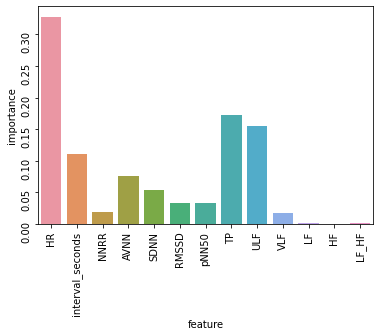

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=importfeature['feature'], y = importfeature['importance'])
plt.tick_params(rotation = 90)